Life Expectancy Data is a dataset that contains life expectancy, health, immunization, economic, and demographic information.

The purpose in this analysis is to build a model that can predict the life expectancy using the given information from the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [17]:
from google.colab import files


uploaded = files.upload()

In [2]:
df=pd.read_csv('Life-Expectancy-Data-Updated.csv')

In [3]:
df.head(10)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
5,Costa Rica,Central America and Caribbean,2006,9.8,11.2,95.2200,4.19,88,86,26.4,...,89,0.16,9110,4.35,2.0,1.9,7.9,0,1,78.2
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.06,97,97,26.2,...,97,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2
7,Hungary,European Union,2000,8.7,10.1,192.9690,12.23,88,99,25.9,...,99,0.08,8971,10.21,2.3,2.3,10.2,1,0,71.2
8,Jordan,Middle East,2001,22.0,26.1,129.7640,0.52,97,87,27.9,...,99,0.13,3708,5.22,4.0,3.9,9.6,0,1,71.9
9,Moldova,Rest of Europe,2008,15.3,17.8,217.8570,7.72,97,92,26.5,...,90,0.43,2235,2.87,2.9,3.1,10.9,0,1,68.7


In [4]:
df.shape

(2864, 21)

In [5]:
df.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [7]:
df_num = df.select_dtypes(include=['float64', 'int64'])

In [8]:
df_str = df.select_dtypes(include=['object'])

From the informations above, it can be seen that the dataset consists of 19 variables that are numeric and 2 variables that are string.

In [9]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


### Data Distribution

In [10]:
df['Country'].value_counts()

,count
Country,
Turkiye,16
Slovak Republic,16
Latvia,16
Angola,16
Jamaica,16
...,...
Kuwait,16
Argentina,16
Panama,16


In [11]:
df['Region'].value_counts()

,count
Region,
Africa,816
European Union,432
Asia,432
Central America and Caribbean,304
Rest of Europe,240
Middle East,224
South America,192
Oceania,176
North America,48


In [12]:
df_num.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


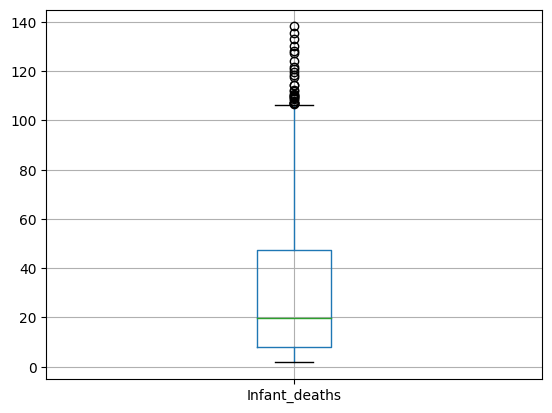

In [34]:
boxplot = df.boxplot(column='Infant_deaths')

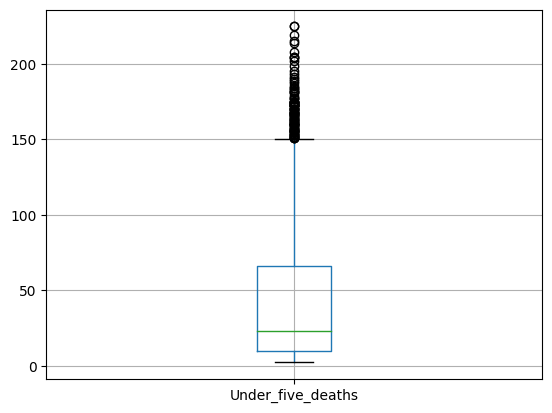

In [ ]:
boxplot = df.boxplot(column='Under_five_deaths')

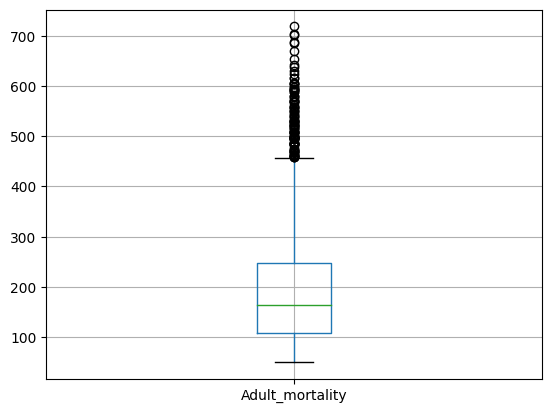

In [ ]:
boxplot = df.boxplot(column='Adult_mortality')

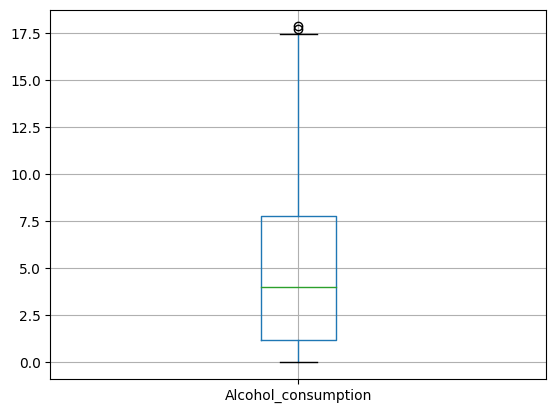

In [ ]:
boxplot = df.boxplot(column='Alcohol_consumption')

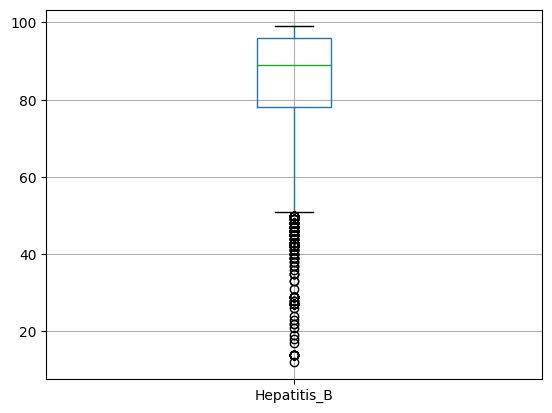

In [ ]:
boxplot = df.boxplot(column='Hepatitis_B')

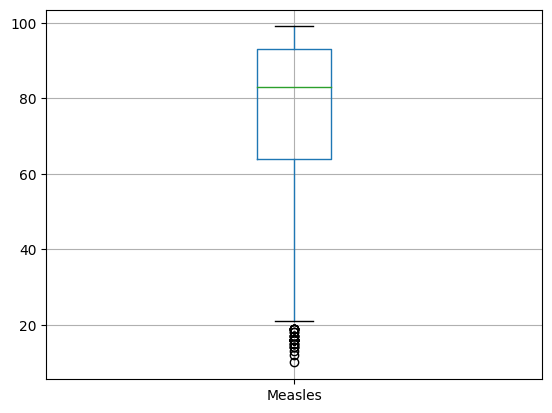

In [ ]:
boxplot = df.boxplot(column='Measles')

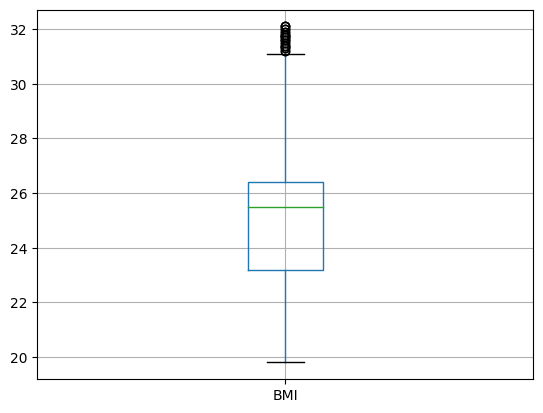

In [ ]:
boxplot = df.boxplot(column='BMI')

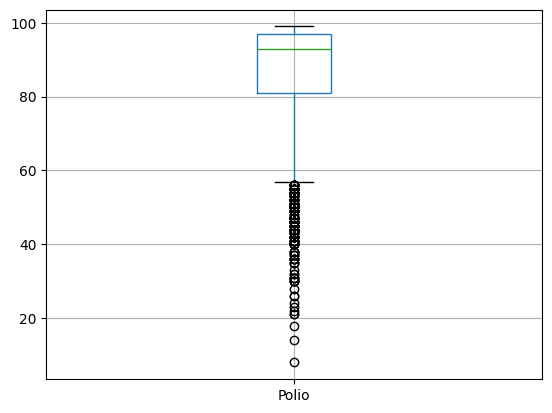

In [ ]:
boxplot = df.boxplot(column='Polio')

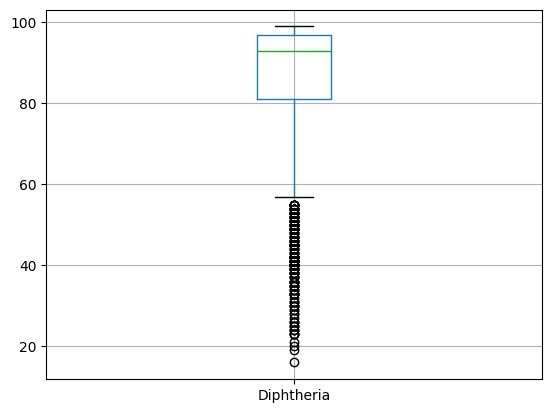

In [ ]:
boxplot = df.boxplot(column='Diphtheria')

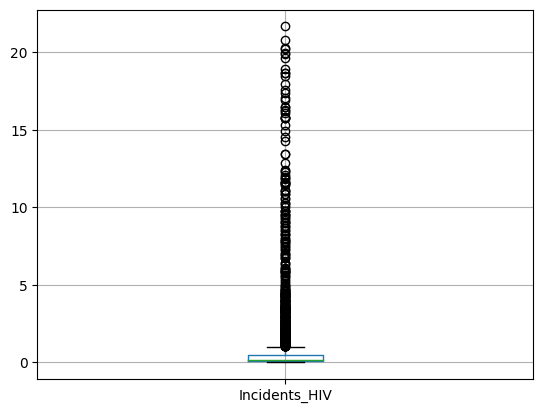

In [ ]:
boxplot = df.boxplot(column='Incidents_HIV')

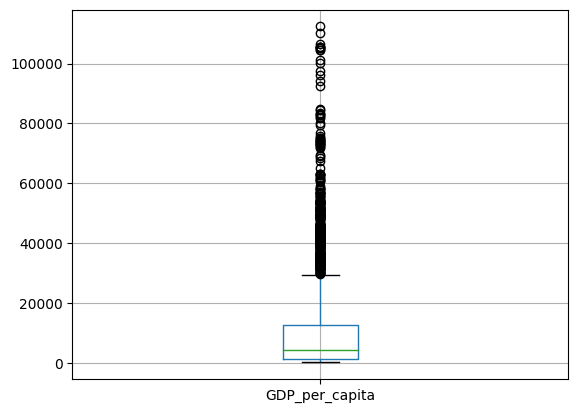

In [ ]:
boxplot = df.boxplot(column='GDP_per_capita')

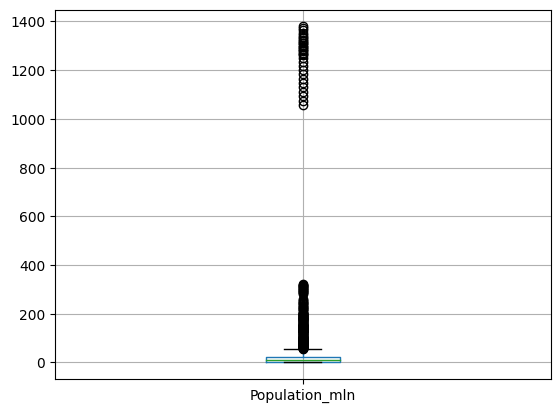

In [ ]:
boxplot = df.boxplot(column='Population_mln')

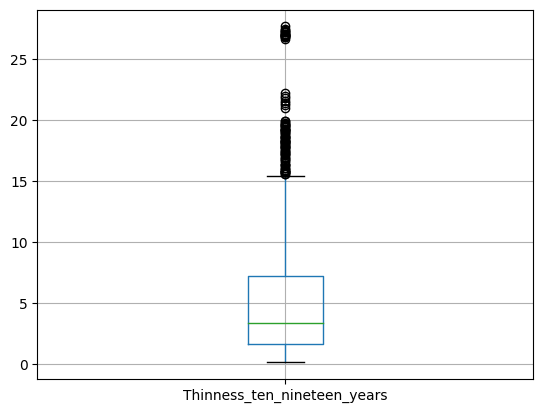

In [ ]:
boxplot = df.boxplot(column='Thinness_ten_nineteen_years')

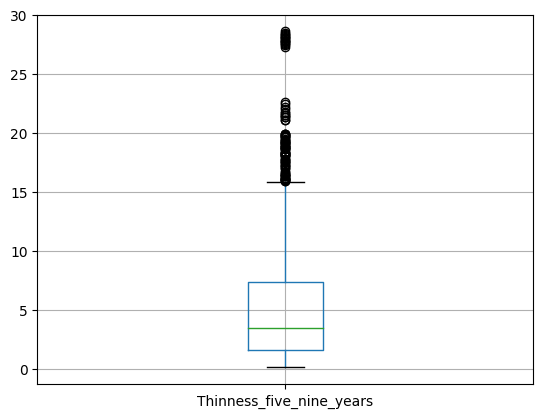

In [ ]:
boxplot = df.boxplot(column='Thinness_five_nine_years')

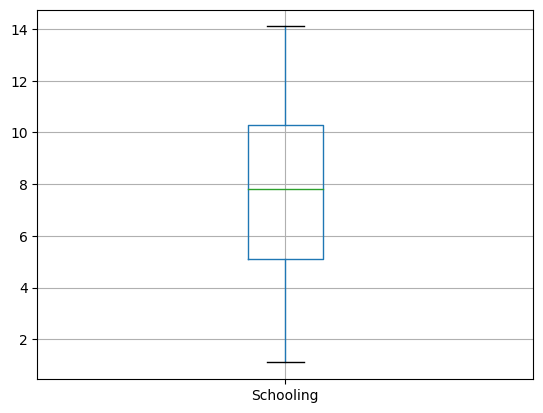

In [ ]:
boxplot = df.boxplot(column='Schooling')

### Splitting Data

The dataset is splitted into 80% training data and 20% testing data.

In [13]:
input_df=df.drop('Life_expectancy',axis=1)
output_df=df['Life_expectancy']

f coded variable for freq encoding

t coded variable for target encoding

In [14]:
from sklearn.model_selection import train_test_split
x_trainf, x_testf, y_trainf, y_testf = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [15]:
from sklearn.model_selection import train_test_split
x_traint, x_testt, y_traint, y_testt = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

### Feature Engineering

Because Region and Country are categorical variables, it should be encoded into numerical variables using frequency encoding.

In [16]:
def features_encode(data,features):
    freq_encoding=data.groupby(features).size()/len(data)
    return freq_encoding

x_trainf['Region']=x_trainf['Region'].map(features_encode(x_trainf,x_trainf['Region']))
x_testf['Region']=x_testf['Region'].map(features_encode(x_testf,x_testf['Region']))

x_trainf['Country']=x_trainf['Country'].map(features_encode(x_trainf,x_trainf['Country']))
x_testf['Country']=x_testf['Country'].map(features_encode(x_testf,x_testf['Country']))

### Modeling - Bagging

For the modeling, we use Bagging as it can helps to reduce variance and improve the overall performance of the model. Also, it is robust to outliers to some extent.

#### Using Frequency Encoding

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings('ignore')

Bagging_class = BaggingRegressor(oob_score = True)
Bagging_class.fit(x_trainf, y_trainf)

BaggingRegressor(oob_score=True)

In [18]:
Bagging_class.oob_score_

0.5397539816158914

In [19]:
y_predictf=Bagging_class.predict(x_testf)

In [20]:
y_train_predictf = Bagging_class.predict(x_trainf)

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MAE Test =',mean_absolute_error(y_testf, y_predictf))
print('MSE Test =',mean_squared_error(y_testf, y_predictf))
print('R squared Test =',r2_score(y_testf, y_predictf))

MAE Test = 0.48443280977312336
MSE Test = 0.4263741710296682
R squared Test = 0.9948624173239003


In [22]:
print('MAE Train =',mean_absolute_error(y_trainf, y_train_predictf))
print('MSE Train =',mean_squared_error(y_trainf, y_train_predictf))
print('R squared Train =',r2_score(y_trainf, y_train_predictf))

MAE Train = 0.17922741161065078
MSE Train = 0.07910165866433871
R squared Train = 0.9991189258328412


#### Using Target Encoder

In [23]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


In [24]:
import warnings
import category_encoders as ce
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')

target_encoder = ce.TargetEncoder(cols=['Country', 'Region'])

bagging_model = BaggingRegressor(oob_score=True)

pipeline = Pipeline(steps=[
    ('target_encoder', target_encoder),
    ('bagging', bagging_model)
])

pipeline.fit(x_traint, y_traint)

y_predt = pipeline.predict(x_testt)


In [25]:
bagging_model.oob_score_

0.3742825258936131

In [26]:
y_predictt=pipeline.predict(x_testt)

In [27]:
y_train_predictt = pipeline.predict(x_traint)

In [28]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MAE Test =',mean_absolute_error(y_testt, y_predictt))
print('MSE Test =',mean_squared_error(y_testt, y_predictt))
print('R squared Test =',r2_score(y_testt, y_predictt))

MAE Test = 0.36012216404886543
MSE Test = 0.2720452006980801
R squared Test = 0.9967219995834944


In [29]:
print('MAE Train =',mean_absolute_error(y_traint, y_train_predictt))
print('MSE Train =',mean_squared_error(y_traint, y_train_predictt))
print('R squared Train =',r2_score(y_traint, y_train_predictt))

MAE Train = 0.156508075076386
MSE Train = 0.06162618943692696
R squared Train = 0.9993135764224147


##### Comparison

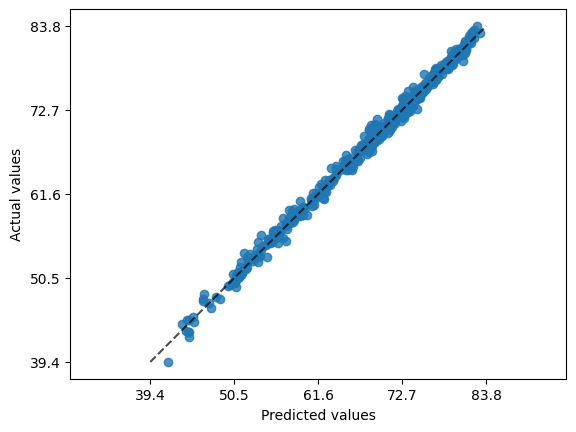

In [30]:
from sklearn.metrics import PredictionErrorDisplay
disp = PredictionErrorDisplay.from_predictions(y_testf, y_predictf, kind = 'actual_vs_predicted')
plt.show()

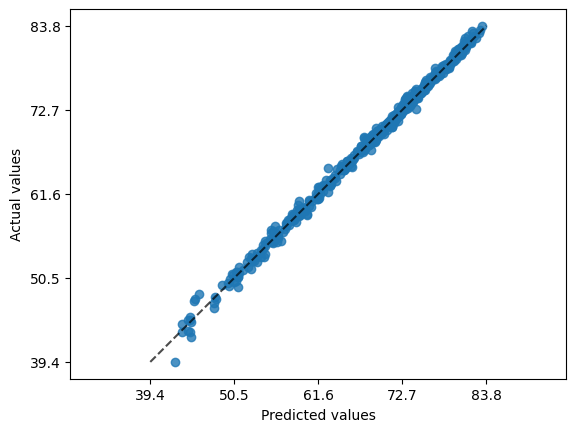

In [31]:
from sklearn.metrics import PredictionErrorDisplay
disp = PredictionErrorDisplay.from_predictions(y_testt, y_predictt, kind = 'actual_vs_predicted')
plt.show()

After comparing target encoding and frequency encoding, the MAE, MSE, and R Square Score is better using target, so the data encoded with target will be used

Looking at the graph, the value is predicted more accurately using Target Encoder

### Feature Scaling

There are some variables that have bigger scale than the other. Therefore, we perform feature scaling to reduce the scale, so every variables have a similar scale.

In [32]:
x_traint.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
2026,Sri Lanka,Asia,2014,7.9,9.3,111.2825,2.45,99,99,22.9,99,99,0.01,3694,20.78,15.2,15.0,10.9,0,1
651,Czechia,European Union,2004,3.7,4.6,114.2985,13.42,98,98,26.6,96,98,0.08,14070,10.20,2.1,2.2,11.6,1,0
2225,"Venezuela, RB",South America,2014,15.4,18.0,143.0785,6.60,78,83,26.6,79,78,0.40,16056,30.04,1.6,1.5,10.0,0,1
2357,Albania,Rest of Europe,2010,11.8,13.3,80.9365,4.88,99,98,26.1,99,99,0.03,3577,2.91,1.4,1.5,9.3,0,1
670,Namibia,Africa,2003,43.3,74.4,495.7265,2.29,83,64,23.2,82,79,9.74,3298,1.88,14.2,14.3,5.8,0,1


#### Scaling and Bagging

In [34]:
import category_encoders as ce
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
import warnings

warnings.filterwarnings('ignore')

target_encoder = ce.TargetEncoder(cols=['Country', 'Region'])

scaler = RobustScaler()

pipeline = Pipeline(steps=[
    ('target_encoder', target_encoder),
    ('scaler', scaler)
])

x_traint_transformed = pipeline.fit_transform(x_traint, y_traint)

x_testt_transformed = pipeline.transform(x_testt)

Bagging_class = BaggingRegressor(oob_score=True)

Bagging_class.fit(x_traint_transformed, y_traint)

y_predt = Bagging_class.predict(x_testt_transformed)


In [35]:
Bagging_class.oob_score_

0.3305930638405016

In [36]:
y_predt=Bagging_class.predict(x_testt_transformed)

In [37]:
y_train_predictt = Bagging_class.predict(x_traint_transformed)

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('MAE Test =',mean_absolute_error(y_testt, y_predt))
print('MSE Test =',mean_squared_error(y_testt, y_predt))
print('R squared Test =',r2_score(y_testt, y_predt))

MAE Test = 0.33891797556719055
MSE Test = 0.24743560209424112
R squared Test = 0.9970185321974365


In [39]:
print('MAE Train =',mean_absolute_error(y_traint, y_train_predictt))
print('MSE Train =',mean_squared_error(y_traint, y_train_predictt))
print('R squared Train =',r2_score(y_traint, y_train_predictt))

MAE Train = 0.1525141859450024
MSE Train = 0.05873814927979053
R squared Train = 0.9993457448701961


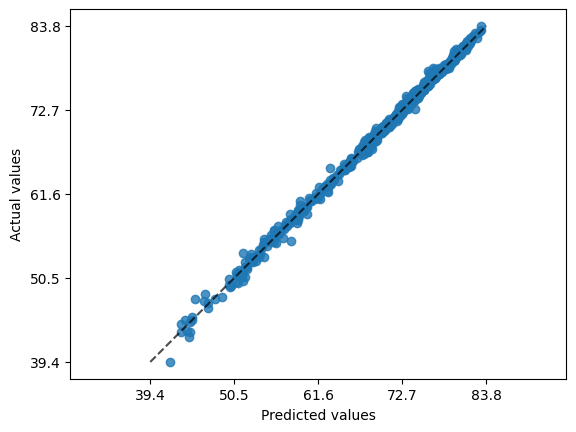

In [40]:
from sklearn.metrics import PredictionErrorDisplay
disp = PredictionErrorDisplay.from_predictions(y_testt, y_predt, kind = 'actual_vs_predicted')
plt.show()

### Conclusion

The model can predict well using the bagging method, when the encoder is Target Encoding for thr column 'Region' and 'Country', then due to the variations of the data, i tried to use robust scaling (due to lots of outliers present) but the result is not really significant.

Meaning that the model is good enough with just Bagging and using Target Encoding, without the scaling.